# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df=pd.read_csv("House_Prices.csv")
df

,id,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4,0,1,1,1,1,...,0,0,0,0,0,0,0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3,0,0,0,0,0,...,0,0,0,0,0,0,0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3,0,1,1,1,1,...,0,0,0,0,0,0,0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2,0,0,1,1,1,...,0,0,0,0,0,0,0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4,0,0,1,1,1,...,0,0,0,0,0,0,0,Banglore,13.054713,77.633926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,24599,620.00,1450,Worli,3,0,1,1,1,1,...,0,1,0,0,0,0,0,Mumbai,19.011696,72.818070
9386,24600,25.00,540,Virar East,1,0,0,0,0,0,...,0,0,0,0,0,0,0,Mumbai,19.457969,72.814214
9387,24601,190.00,1267,Belapur,3,1,0,1,1,1,...,0,0,0,0,0,0,0,Mumbai,29.363160,80.723436
9388,24602,149.00,1245,Airoli,2,0,0,0,0,0,...,0,0,0,0,0,0,0,Mumbai,29.656246,79.432182


# Exploratory Data Analysis

In [4]:
df.columns

Index(['id', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9390 non-null   int64  
 1   Price                9390 non-null   float64
 2   Area                 9390 non-null   int64  
 3   Location             9390 non-null   object 
 4   No. of Bedrooms      9390 non-null   int64  
 5   Resale               9390 non-null   int64  
 6   MaintenanceStaff     9390 non-null   int64  
 7   Gymnasium            9390 non-null   int64  
 8   SwimmingPool         9390 non-null   int64  
 9   LandscapedGardens    9390 non-null   int64  
 10  JoggingTrack         9390 non-null   int64  
 11  RainWaterHarvesting  9390 non-null   int64  
 12  IndoorGames          9390 non-null   int64  
 13  ShoppingMall         9390 non-null   int64  
 14  Intercom             9390 non-null   int64  
 15  SportsFacility       9390 non-null   i

In [6]:
df.describe()

,id,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,...,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,11149.285091,105.614563,1354.274973,2.472311,0.352183,0.171778,0.509904,0.405644,0.342279,0.320554,...,0.296166,0.049414,0.022258,0.056550,0.053248,0.051544,0.021832,0.051864,18.778749,74.315855
std,7292.839800,139.664066,719.154146,0.762603,0.477676,0.377208,0.499929,0.491042,0.474498,0.466714,...,0.456589,0.216743,0.147528,0.230992,0.224540,0.221117,0.146142,0.221764,7.554944,18.613870
min,0.000000,20.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.816624,-117.147666
25%,5957.250000,45.000000,924.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.980165,77.036315
50%,10828.500000,70.000000,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.451210,77.746994
75%,16088.750000,122.000000,1610.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.227342,79.922469
max,24603.000000,4000.000000,9900.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.447377,127.655678


In [7]:
df.dtypes

id                       int64
Price                  float64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff         int64
Gymnasium                int64
SwimmingPool             int64
LandscapedGardens        int64
JoggingTrack             int64
RainWaterHarvesting      int64
IndoorGames              int64
ShoppingMall             int64
Intercom                 int64
SportsFacility           int64
ATM                      int64
ClubHouse                int64
School                   int64
24X7Security             int64
PowerBackup              int64
CarParking               int64
StaffQuarter             int64
Cafeteria                int64
MultipurposeRoom         int64
Hospital                 int64
WashingMachine           int64
Gasconnection            int64
AC                       int64
Wifi                     int64
Children'splayarea       int64
LiftAvailable            int64
BED     

# Data Transformation

In [8]:
label=LabelEncoder()
df['Location']=label.fit_transform(df['Location'])
df['City']=label.fit_transform(df['City'])

In [9]:
df.isnull().sum()

id                     0
Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


# data visualization 

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>

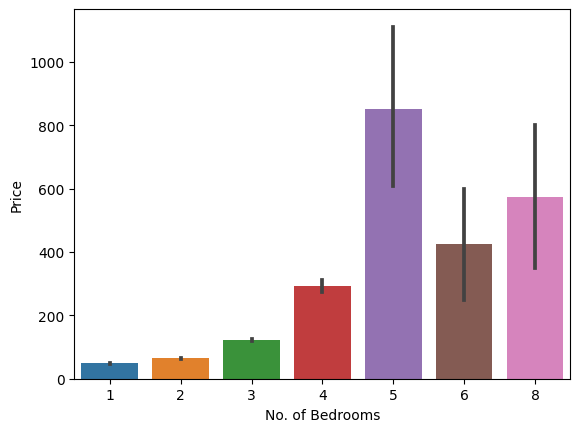

In [10]:
# bar plot
sns.barplot(x='No. of Bedrooms',y='Price',data = df)

<AxesSubplot:xlabel='Area', ylabel='Price'>

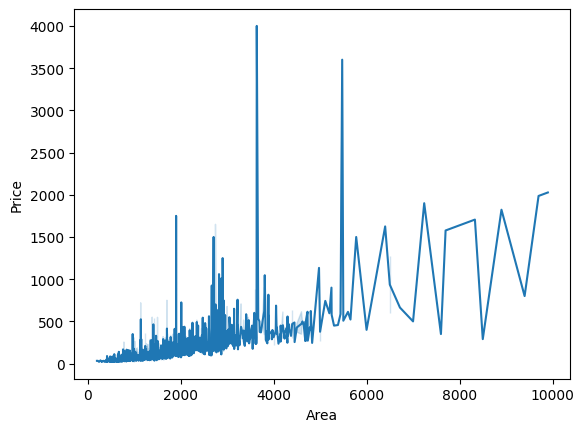

In [11]:
#line plot
sns.lineplot(x='Area',y='Price',data = df)

<AxesSubplot:>

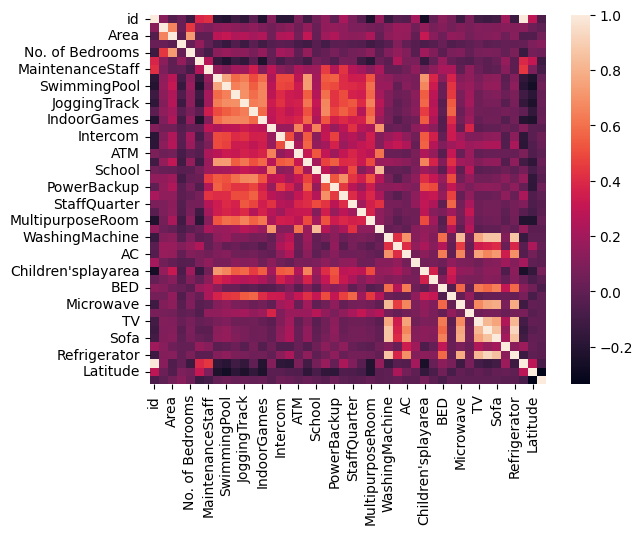

In [12]:
#heatmap
sns.heatmap(df.corr())

# split data into x and y 

In [15]:
x=df.drop(labels='Price',axis=1)
y= df['Price']
print(x)
print(y)

         id  Area  Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0         0  3340       227                4       0                 1   
1         1  1675       143                3       0                 0   
2         2  1670       281                3       0                 1   
3         3  1220       213                2       0                 0   
4         4  2502       651                4       0                 0   
...     ...   ...       ...              ...     ...               ...   
9385  24599  1450       712                3       0                 1   
9386  24600   540       695                1       0                 0   
9387  24601  1267        79                3       1                 0   
9388  24602  1245         7                2       0                 0   
9389  24603  1183         7                2       0                 0   

      Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0             1             1           

# Split data into train and test

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(7512, 43)
(7512,)
(1878,)
(1878, 43)


In [17]:
from sklearn.linear_model import LinearRegression
log=LinearRegression()
log.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = log.predict(x_test)
y_pred

array([352.30724885, 113.86206656,  87.83347295, ...,  69.39462022,
       123.12915222,   6.31753658])